<a href="https://colab.research.google.com/github/furlancad/Estudo-PMF/blob/main/Estudo_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [290]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

In [291]:
tickers_IBOV = ['RRRP3', 'ALSO3', 'ALPA4', 'ABEV3', 'ARZZ3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBSE3', 'BBDC3', 'BBDC4', 'BRAP4', 'BBAS3', 'BRKM5', 'BRFS3', 'BPAC11', 'CRFB3', 'BHIA3', 'CCRO3', 'CMIG4', 'CIEL3', 'COGN3', 'CPLE6', 'CSAN3', 'CPFE3', 'CMIN3', 'CVCB3', 'CYRE3', 'DXCO3', 'ELET3', 'ELET6', 'EMBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'NTCO3', 'SOMA3', 'HAPV3', 'HYPE3', 'IGTI11', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'RENT3', 'LWSA3', 'LREN3', 'MGLU3', 'MRFG3', 'BEEF3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR3', 'PETR4', 'RECV3', 'PRIO3', 'PETZ3', 'RADL3', 'RAIZ4', 'RDOR3', 'RAIL3', 'SBSP3', 'SANB11', 'SMTO3', 'CSNA3', 'SLCE3', 'SUZB3', 'TAEE11', 'VIVT3', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VAMO3', 'VBBR3', 'WEGE3', 'YDUQ3']

In [292]:
tickers_IBOV.sort()

In [293]:
tickers_IBOV

['ABEV3',
 'ALPA4',
 'ALSO3',
 'ARZZ3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BBAS3',
 'BBDC3',
 'BBDC4',
 'BBSE3',
 'BEEF3',
 'BHIA3',
 'BPAC11',
 'BRAP4',
 'BRFS3',
 'BRKM5',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'CMIN3',
 'COGN3',
 'CPFE3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'EGIE3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENEV3',
 'ENGI11',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'KLBN11',
 'LREN3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'MULT3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PETZ3',
 'PRIO3',
 'RADL3',
 'RAIL3',
 'RAIZ4',
 'RDOR3',
 'RECV3',
 'RENT3',
 'RRRP3',
 'SANB11',
 'SBSP3',
 'SLCE3',
 'SMTO3',
 'SOMA3',
 'SUZB3',
 'TAEE11',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VAMO3',
 'VBBR3',
 'VIVT3',
 'WEGE3',
 'YDUQ3']

In [294]:
tickers_IBOV_SA = [i + '.SA' for i in tickers_IBOV]

In [295]:
#-------------------------------------

In [296]:
cotacoes_ibov_auto_adjust = yf.download(tickers_IBOV_SA, period='5y', auto_adjust=True)
cotacoes_ibov_auto_adjust.head()

[*********************100%%**********************]  86 of 86 completed


Close                                                       \
             ABEV3.SA   ALPA4.SA   ALSO3.SA   ARZZ3.SA ASAI3.SA   AZUL4.SA   
Date                                                                         
2018-10-30  13.584669  11.999656  21.389858  43.114422      NaN  30.959999   
2018-10-31  13.830127  11.999656  21.371235  43.481350      NaN  30.590000   
2018-11-01  13.855516  12.363043  21.883398  44.426212      NaN  31.639999   
2018-11-05  13.931691  12.173450  21.436419  43.343754      NaN  32.549999   
2018-11-06  14.084043  12.378842  22.013767  43.114422      NaN  31.650000   

                                                       ...   Volume           \
            B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ... TIMS3.SA TOTS3.SA   
Date                                                   ...                     
2018-10-30  7.381191  31.349598  14.948946  17.185913  ...  9703900  1920642   
2018-10-31  7.420334  31.095024  14.870297  16.963352  ...  9116900  2827161   
2018-11-01  7.671963  31.553259  15.651906  17.932695  ...  6368500  1957011   
2018-11-05  7.618844  31.575073  16.230942  18.318142  ...  9284200  3329714   
2018-11-06  7.509804  30.891359  15.950579  18.120220  ...  9616000  2376306   

                                                                               \
            UGPA3.SA  USIM5.SA  VALE3.SA VAMO3.SA VBBR3.SA VIVT3.SA  WEGE3.SA   
Date                                                                            
2018-10-30   9910800  22554300  23799200      NaN  5091900   112400  10193400   
2018-10-31  10728200  22624300  26626000      NaN  4171300    17500  10170200   
2018-11-01   4810400  18909200  20420000      NaN  5020100    25400   8679200   
2018-11-05  11012400  12802200  15491800      NaN  5231900    15700   7289600   
2018-11-06   5947400  11008400  11211000      NaN  5420600     5400   6576200   

                     
           YDUQ3.SA  
Date                 
2018-10-30  4196200  
2018-10-31  3164900  
2018-11-01  3622200  
2018-11-05  3079700  
2018-11-06  3036800  

[5 rows x 430 columns]

In [297]:
cotacoes_ibov = yf.download(tickers_IBOV_SA, period='5y')
cotacoes_ibov.head()

[*********************100%%**********************]  86 of 86 completed


Adj Close                                                       \
             ABEV3.SA   ALPA4.SA   ALSO3.SA   ARZZ3.SA ASAI3.SA   AZUL4.SA   
Date                                                                         
2018-10-30  13.584669  11.999656  21.389858  43.114426      NaN  30.959999   
2018-10-31  13.830126  11.999656  21.371235  43.481358      NaN  30.590000   
2018-11-01  13.855517  12.363043  21.883398  44.426208      NaN  31.639999   
2018-11-05  13.931691  12.173449  21.436420  43.343761      NaN  32.549999   
2018-11-06  14.084044  12.378842  22.013767  43.114426      NaN  31.650000   

                                                       ...   Volume           \
            B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ... TIMS3.SA TOTS3.SA   
Date                                                   ...                     
2018-10-30  7.381192  31.349602  14.948955  17.185909  ...  9703900  1920642   
2018-10-31  7.420334  31.095024  14.870303  16.963362  ...  9116900  2827161   
2018-11-01  7.671966  31.553253  15.651919  17.932692  ...  6368500  1957011   
2018-11-05  7.618844  31.575087  16.230936  18.318144  ...  9284200  3329714   
2018-11-06  7.509803  30.891348  15.950579  18.120214  ...  9616000  2376306   

                                                                               \
            UGPA3.SA  USIM5.SA  VALE3.SA VAMO3.SA VBBR3.SA VIVT3.SA  WEGE3.SA   
Date                                                                            
2018-10-30   9910800  22554300  23799200      NaN  5091900   112400  10193400   
2018-10-31  10728200  22624300  26626000      NaN  4171300    17500  10170200   
2018-11-01   4810400  18909200  20420000      NaN  5020100    25400   8679200   
2018-11-05  11012400  12802200  15491800      NaN  5231900    15700   7289600   
2018-11-06   5947400  11008400  11211000      NaN  5420600     5400   6576200   

                     
           YDUQ3.SA  
Date                 
2018-10-30  4196200  
2018-10-31  3164900  
2018-11-01  3622200  
2018-11-05  3079700  
2018-11-06  3036800  

[5 rows x 516 columns]

In [298]:
set(cotacoes_ibov.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

In [299]:
set(cotacoes_ibov.columns.get_level_values(1))

{'ABEV3.SA',
 'ALPA4.SA',
 'ALSO3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BHIA3.SA',
 'BPAC11.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'PRIO3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RECV3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SLCE3.SA',
 'SMTO3.SA',
 'SOMA3.SA',
 'SUZB3.SA',
 'TAEE11.SA',
 'TIMS

In [300]:
cotacoes_ibov.shape

(1240, 516)

In [301]:
count_na_vertical = cotacoes_ibov.isna().sum()
count_na_vertical

Adj Close  ABEV3.SA      0
           ALPA4.SA      0
           ALSO3.SA      1
           ARZZ3.SA      0
           ASAI3.SA    572
                      ... 
Volume     VAMO3.SA    555
           VBBR3.SA      0
           VIVT3.SA      0
           WEGE3.SA      0
           YDUQ3.SA      0
Length: 516, dtype: int64

In [302]:
count_na_horizontal = cotacoes_ibov.isna().sum(1)
count_na_horizontal

Date
2018-10-30    72
2018-10-31    72
2018-11-01    72
2018-11-05    72
2018-11-06    72
              ..
2023-10-24     0
2023-10-25     0
2023-10-26     0
2023-10-27     0
2023-10-30     6
Length: 1240, dtype: int64

In [303]:
count_na_vertical/cotacoes_ibov.shape[0]

Adj Close  ABEV3.SA    0.000000
           ALPA4.SA    0.000000
           ALSO3.SA    0.000806
           ARZZ3.SA    0.000000
           ASAI3.SA    0.461290
                         ...   
Volume     VAMO3.SA    0.447581
           VBBR3.SA    0.000000
           VIVT3.SA    0.000000
           WEGE3.SA    0.000000
           YDUQ3.SA    0.000000
Length: 516, dtype: float64

In [304]:
count_na_horizontal/cotacoes_ibov.shape[1]

Date
2018-10-30    0.139535
2018-10-31    0.139535
2018-11-01    0.139535
2018-11-05    0.139535
2018-11-06    0.139535
                ...   
2023-10-24    0.000000
2023-10-25    0.000000
2023-10-26    0.000000
2023-10-27    0.000000
2023-10-30    0.011628
Length: 1240, dtype: float64

In [305]:
cotacoes_ibov[count_na_horizontal/cotacoes_ibov.shape[1] < 0.02]

Adj Close                                                         \
             ABEV3.SA   ALPA4.SA   ALSO3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-08-05  15.195115  60.338097  26.155815  88.100143  17.114944  37.779999   
2021-08-06  15.633963  60.545784  26.394289  89.632324  17.272324  37.970001   
2021-08-09  15.688817  60.229309  26.670919  88.961990  17.870365  37.970001   
2021-08-10  15.277396  59.448009  26.079504  88.195900  18.108398  37.860001   
2021-08-11  15.149400  59.537018  26.079504  88.081001  17.756264  37.700001   
...               ...        ...        ...        ...        ...        ...   
2023-10-24  12.520000   7.830000  23.330000  60.520000  11.380000  13.200000   
2023-10-25  12.440000   7.790000  23.330000  59.119999  11.030000  12.850000   
2023-10-26  12.630000   8.020000  23.330000  61.099998  11.700000  13.360000   
2023-10-27  12.290000   7.780000  23.129999  58.799999  11.130000  12.790000   
2023-10-30  12.360000   7.880000        NaN  57.759998  10.960000  12.430000   

                                                        ...   Volume           \
             B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ... TIMS3.SA TOTS3.SA   
Date                                                    ...                     
2021-08-05  14.504801  25.841156  16.216413  19.030615  ...  6664100  7805800   
2021-08-06  14.680225  26.628538  16.559357  19.448963  ...  4757900  3593800   
2021-08-09  14.560197  26.385624  16.543024  19.440762  ...  4730000  2806400   
2021-08-10  14.320144  25.715511  16.257240  19.161865  ...  8259200  3253800   
2021-08-11  13.895432  25.464222  16.363392  19.235685  ...  6736400  3657300   
...               ...        ...        ...        ...  ...      ...      ...   
2023-10-24  11.600000  49.040001  12.490000  14.180000  ...  4080800  3735600   
2023-10-25  11.540000  49.049999  12.410000  14.140000  ...  4128400  3956600   
2023-10-26  11.730000  50.070000  12.700000  14.500000  ...  5887100  3587800   
2023-10-27  11.200000  48.799999  12.490000  14.350000  ...  9745300  3071100   
2023-10-30  11.080000  48.459999  12.390000  14.190000  ...        0        0   

                                                                         \
            UGPA3.SA  USIM5.SA  VALE3.SA    VAMO3.SA  VBBR3.SA VIVT3.SA   
Date                                                                      
2021-08-05   6398400  27692500  32215200   2889200.0  12957200  1842700   
2021-08-06   5457500  12182600  19273100   4213600.0   6234600  1990500   
2021-08-09  12278700  18410200  21502300   2489200.0   9161000  1456500   
2021-08-10   4239800  16105600  17440500   2894400.0   9229200  4214000   
2021-08-11  13911300  12516900  14680600   1857200.0  29373700  2050900   
...              ...       ...       ...         ...       ...      ...   
2023-10-24   6695200  10958300  21768800   8443800.0   6328600  2111300   
2023-10-25   4952600  11505800  26091800  13622500.0   6258200  1620800   
2023-10-26   9456200  10199500  30936700   6790200.0   9299500  3252300   
2023-10-27   4648900  27125500  47989100   5750900.0   5754900  2805300   
2023-10-30         0         0         0         0.0         0        0   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2021-08-05   6043400  1806600  
2021-08-06   5303200  2829300  
2021-08-09   4590500  1865600  
2021-08-10   6652900  2622900  
2021-08-11   8547200  3836500  
...              ...      ...  
2023-10-24   9893700  5451600  
2023-10-25  43128700  5141500  
2023-10-26  19917500  3632900  
2023-10-27  13106900  4291500  
2023-10-30         0        0  

[558 rows x 516 columns]

In [306]:
#cotacoes_ibov_close = cotacoes_ibov['Close']
#cotacoes_ibov_close.head()

In [307]:
#cotacoes_ibov_close_abev = pd.DataFrame(cotacoes_ibov[( 'Close', 'ABEV3.SA')])
#cotacoes_ibov_close_abev

In [308]:
#cotacoes_ibov.dropna(subset=[('Adj Close', 'ASAI3.SA')])

In [309]:
#cotacoes_ibov.dropna()

In [310]:
#cotacoes_ibov.dropna(subset=[('Adj Close', 'ASAI3.SA')], inplace=True)

In [311]:
#cotacoes_ibov.isna().sum()

In [371]:
cotacoes_ibov.columns.get_level_values(0)

Index(['Adj Close', 'Adj Close', 'Adj Close', 'Adj Close', 'Adj Close',
       'Adj Close', 'Adj Close', 'Adj Close', 'Adj Close', 'Adj Close',
       ...
       'Volume', 'Volume', 'Volume', 'Volume', 'Volume', 'Volume', 'Volume',
       'Volume', 'Volume', 'Volume'],
      dtype='object', length=516)

In [374]:
cotacoes_ibov.columns.get_level_values(1)

Index(['ABEV3.SA', 'ALPA4.SA', 'ALSO3.SA', 'ARZZ3.SA', 'ASAI3.SA', 'AZUL4.SA',
       'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA',
       ...
       'TIMS3.SA', 'TOTS3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VAMO3.SA',
       'VBBR3.SA', 'VIVT3.SA', 'WEGE3.SA', 'YDUQ3.SA'],
      dtype='object', length=516)

In [377]:
cotacoes_ibov.columns.get_level_values(1).str.replace('.SA', '')

<ipython-input-377-a83e84940a2c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cotacoes_ibov.columns.get_level_values(1).str.replace('.SA', '')


Index(['ABEV3', 'ALPA4', 'ALSO3', 'ARZZ3', 'I3', 'AZUL4', 'B3', 'BBAS3',
       'BBDC3', 'BBDC4',
       ...
       'TIMS3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VAMO3', 'VBBR3', 'VIVT3',
       'WEGE3', 'YDUQ3'],
      dtype='object', length=516)

In [368]:
set(cotacoes_ibov.columns.get_level_values(1)[cotacoes_ibov.isna().sum() > 0])

{'ALSO3.SA',
 'ASAI3.SA',
 'BPAC11.SA',
 'CMIN3.SA',
 'ENGI11.SA',
 'IGTI11.SA',
 'KLBN11.SA',
 'LWSA3.SA',
 'NTCO3.SA',
 'PETZ3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RECV3.SA',
 'RRRP3.SA',
 'SANB11.SA',
 'SOMA3.SA',
 'TAEE11.SA',
 'VAMO3.SA'}

In [313]:
cotacoes_ibov[cotacoes_ibov.columns[cotacoes_ibov.isna().sum() > 0]].isna().sum()

Adj Close  ALSO3.SA       1
           ASAI3.SA     572
           BPAC11.SA      1
           CMIN3.SA     567
           ENGI11.SA      1
                       ... 
Volume     RRRP3.SA     504
           SANB11.SA      1
           SOMA3.SA     432
           TAEE11.SA      1
           VAMO3.SA     555
Length: 108, dtype: int64

In [379]:
max(cotacoes_ibov.isna().sum())

755

In [314]:
cotacoes_ibov.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'ALSO3.SA'),
            ('Adj Close', 'ARZZ3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VAMO3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           length=516)

In [318]:
#-----------------------------

In [319]:
adjclose_ibov = yf.download(tickers_IBOV_SA, period='5y')['Adj Close']
adjclose_ibov.head()

[*********************100%%**********************]  86 of 86 completed


,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-30,13.584669,11.999656,21.389858,43.114422,NaN,30.959999,7.381194,31.349607,14.948953,17.185907,...,9.534540,8.095167,20.413425,8.433830,37.111187,NaN,17.235462,26.923609,8.533369,19.683733
2018-10-31,13.830126,11.999656,21.371237,43.481358,NaN,30.590000,7.420335,31.095020,14.870289,16.963364,...,9.436831,7.965060,19.931467,8.368704,39.067673,NaN,17.071726,26.999758,8.393479,20.261894
2018-11-01,13.855517,12.363043,21.883400,44.426208,NaN,31.639999,7.671966,31.553259,15.651911,17.932693,...,9.884655,8.431539,19.931467,8.238453,39.611908,NaN,16.644573,27.920525,8.486736,20.165533
2018-11-05,13.931692,12.173450,21.436420,43.343754,NaN,32.549999,7.618843,31.575089,16.230944,18.318144,...,10.226628,8.329992,19.350414,8.295438,39.632568,NaN,16.089281,28.086660,8.724555,21.076572
2018-11-06,14.084044,12.378842,22.013767,43.114422,NaN,31.650000,7.509802,30.891359,15.950573,18.120214,...,10.234771,8.158632,19.233303,8.083778,39.425900,NaN,16.117758,28.135132,8.719891,20.769972


In [320]:
adjclose_ibov.index

DatetimeIndex(['2018-10-30', '2018-10-31', '2018-11-01', '2018-11-05',
               '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09',
               '2018-11-12', '2018-11-13',
               ...
               '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20',
               '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26',
               '2023-10-27', '2023-10-30'],
              dtype='datetime64[ns]', name='Date', length=1240, freq=None)

In [321]:
adjclose_ibov.columns

Index(['ABEV3.SA', 'ALPA4.SA', 'ALSO3.SA', 'ARZZ3.SA', 'ASAI3.SA', 'AZUL4.SA',
       'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA',
       'BHIA3.SA', 'BPAC11.SA', 'BRAP4.SA', 'BRFS3.SA', 'BRKM5.SA', 'CCRO3.SA',
       'CIEL3.SA', 'CMIG4.SA', 'CMIN3.SA', 'COGN3.SA', 'CPFE3.SA', 'CPLE6.SA',
       'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DXCO3.SA',
       'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENEV3.SA', 'ENGI11.SA',
       'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA',
       'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA',
       'JBSS3.SA', 'KLBN11.SA', 'LREN3.SA', 'LWSA3.SA', 'MGLU3.SA', 'MRFG3.SA',
       'MRVE3.SA', 'MULT3.SA', 'NTCO3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA',
       'PETZ3.SA', 'PRIO3.SA', 'RADL3.SA', 'RAIL3.SA', 'RAIZ4.SA', 'RDOR3.SA',
       'RECV3.SA', 'RENT3.SA', 'RRRP3.SA', 'SANB11.SA', 'SBSP3.SA', 'SLCE3.SA',
       'SMTO3.SA', 'SOMA3.SA', 'SUZB3.SA', 'TAE

In [322]:
set(adjclose_ibov.columns)

{'ABEV3.SA',
 'ALPA4.SA',
 'ALSO3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BHIA3.SA',
 'BPAC11.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'PRIO3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RECV3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SLCE3.SA',
 'SMTO3.SA',
 'SOMA3.SA',
 'SUZB3.SA',
 'TAEE11.SA',
 'TIMS

<Axes: >

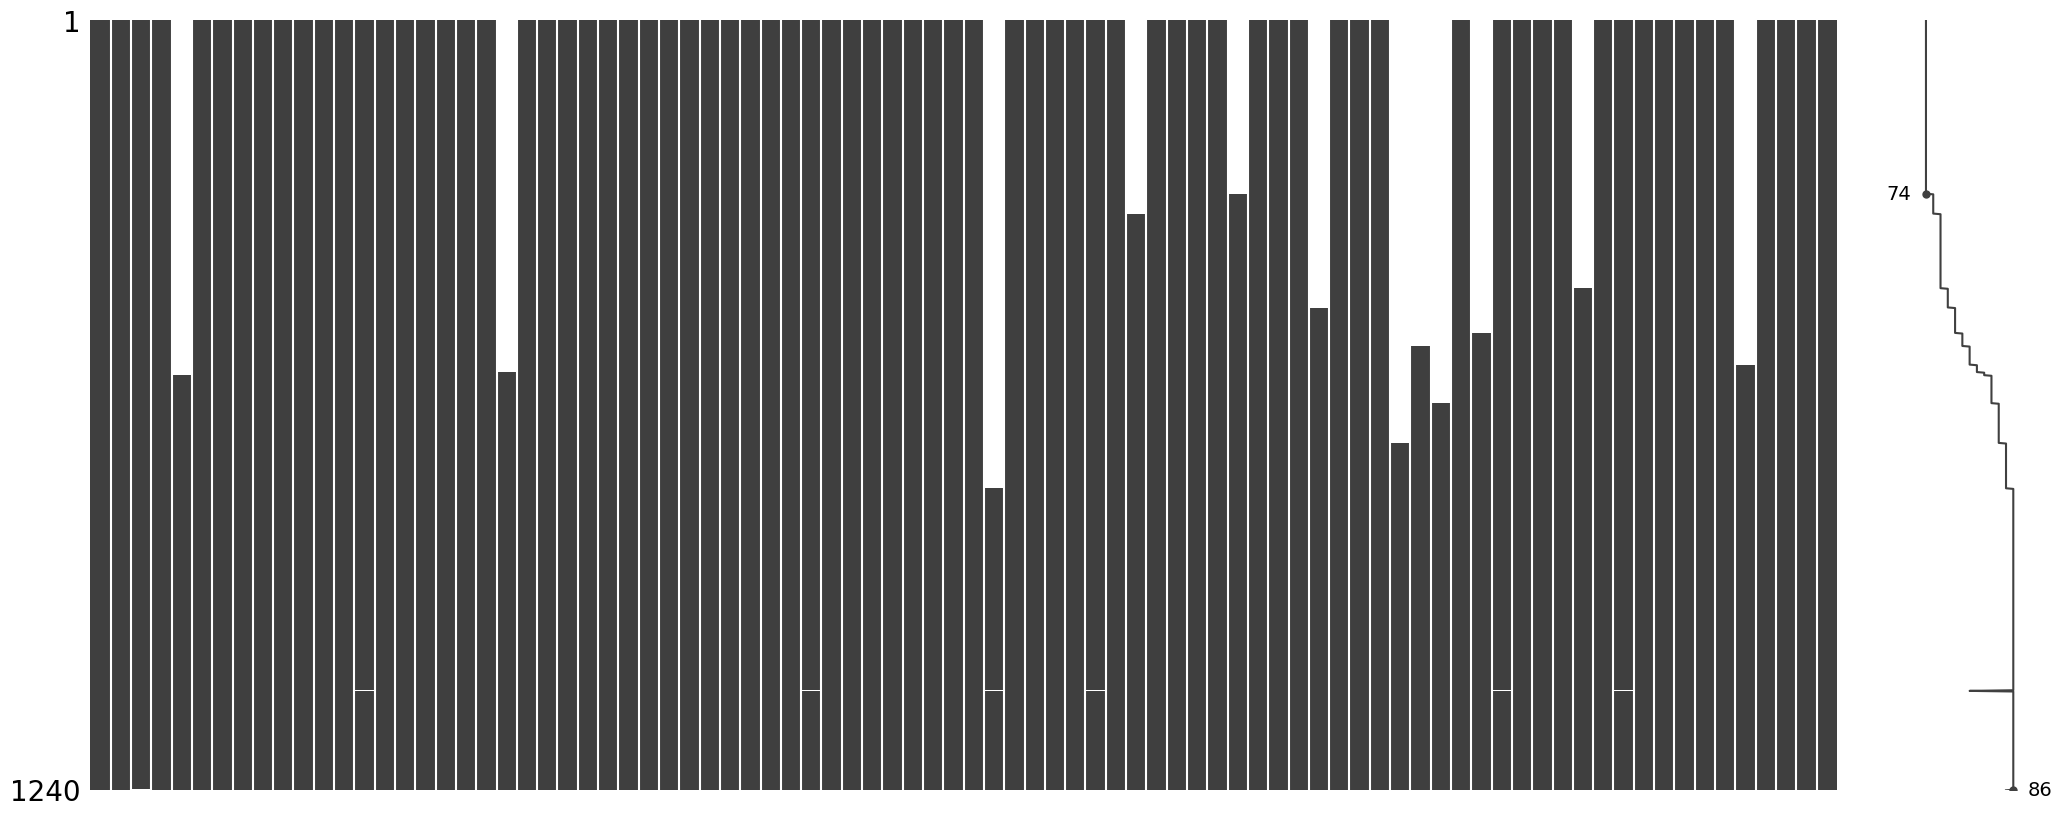

In [323]:
msno.matrix(adjclose_ibov)

<Axes: >

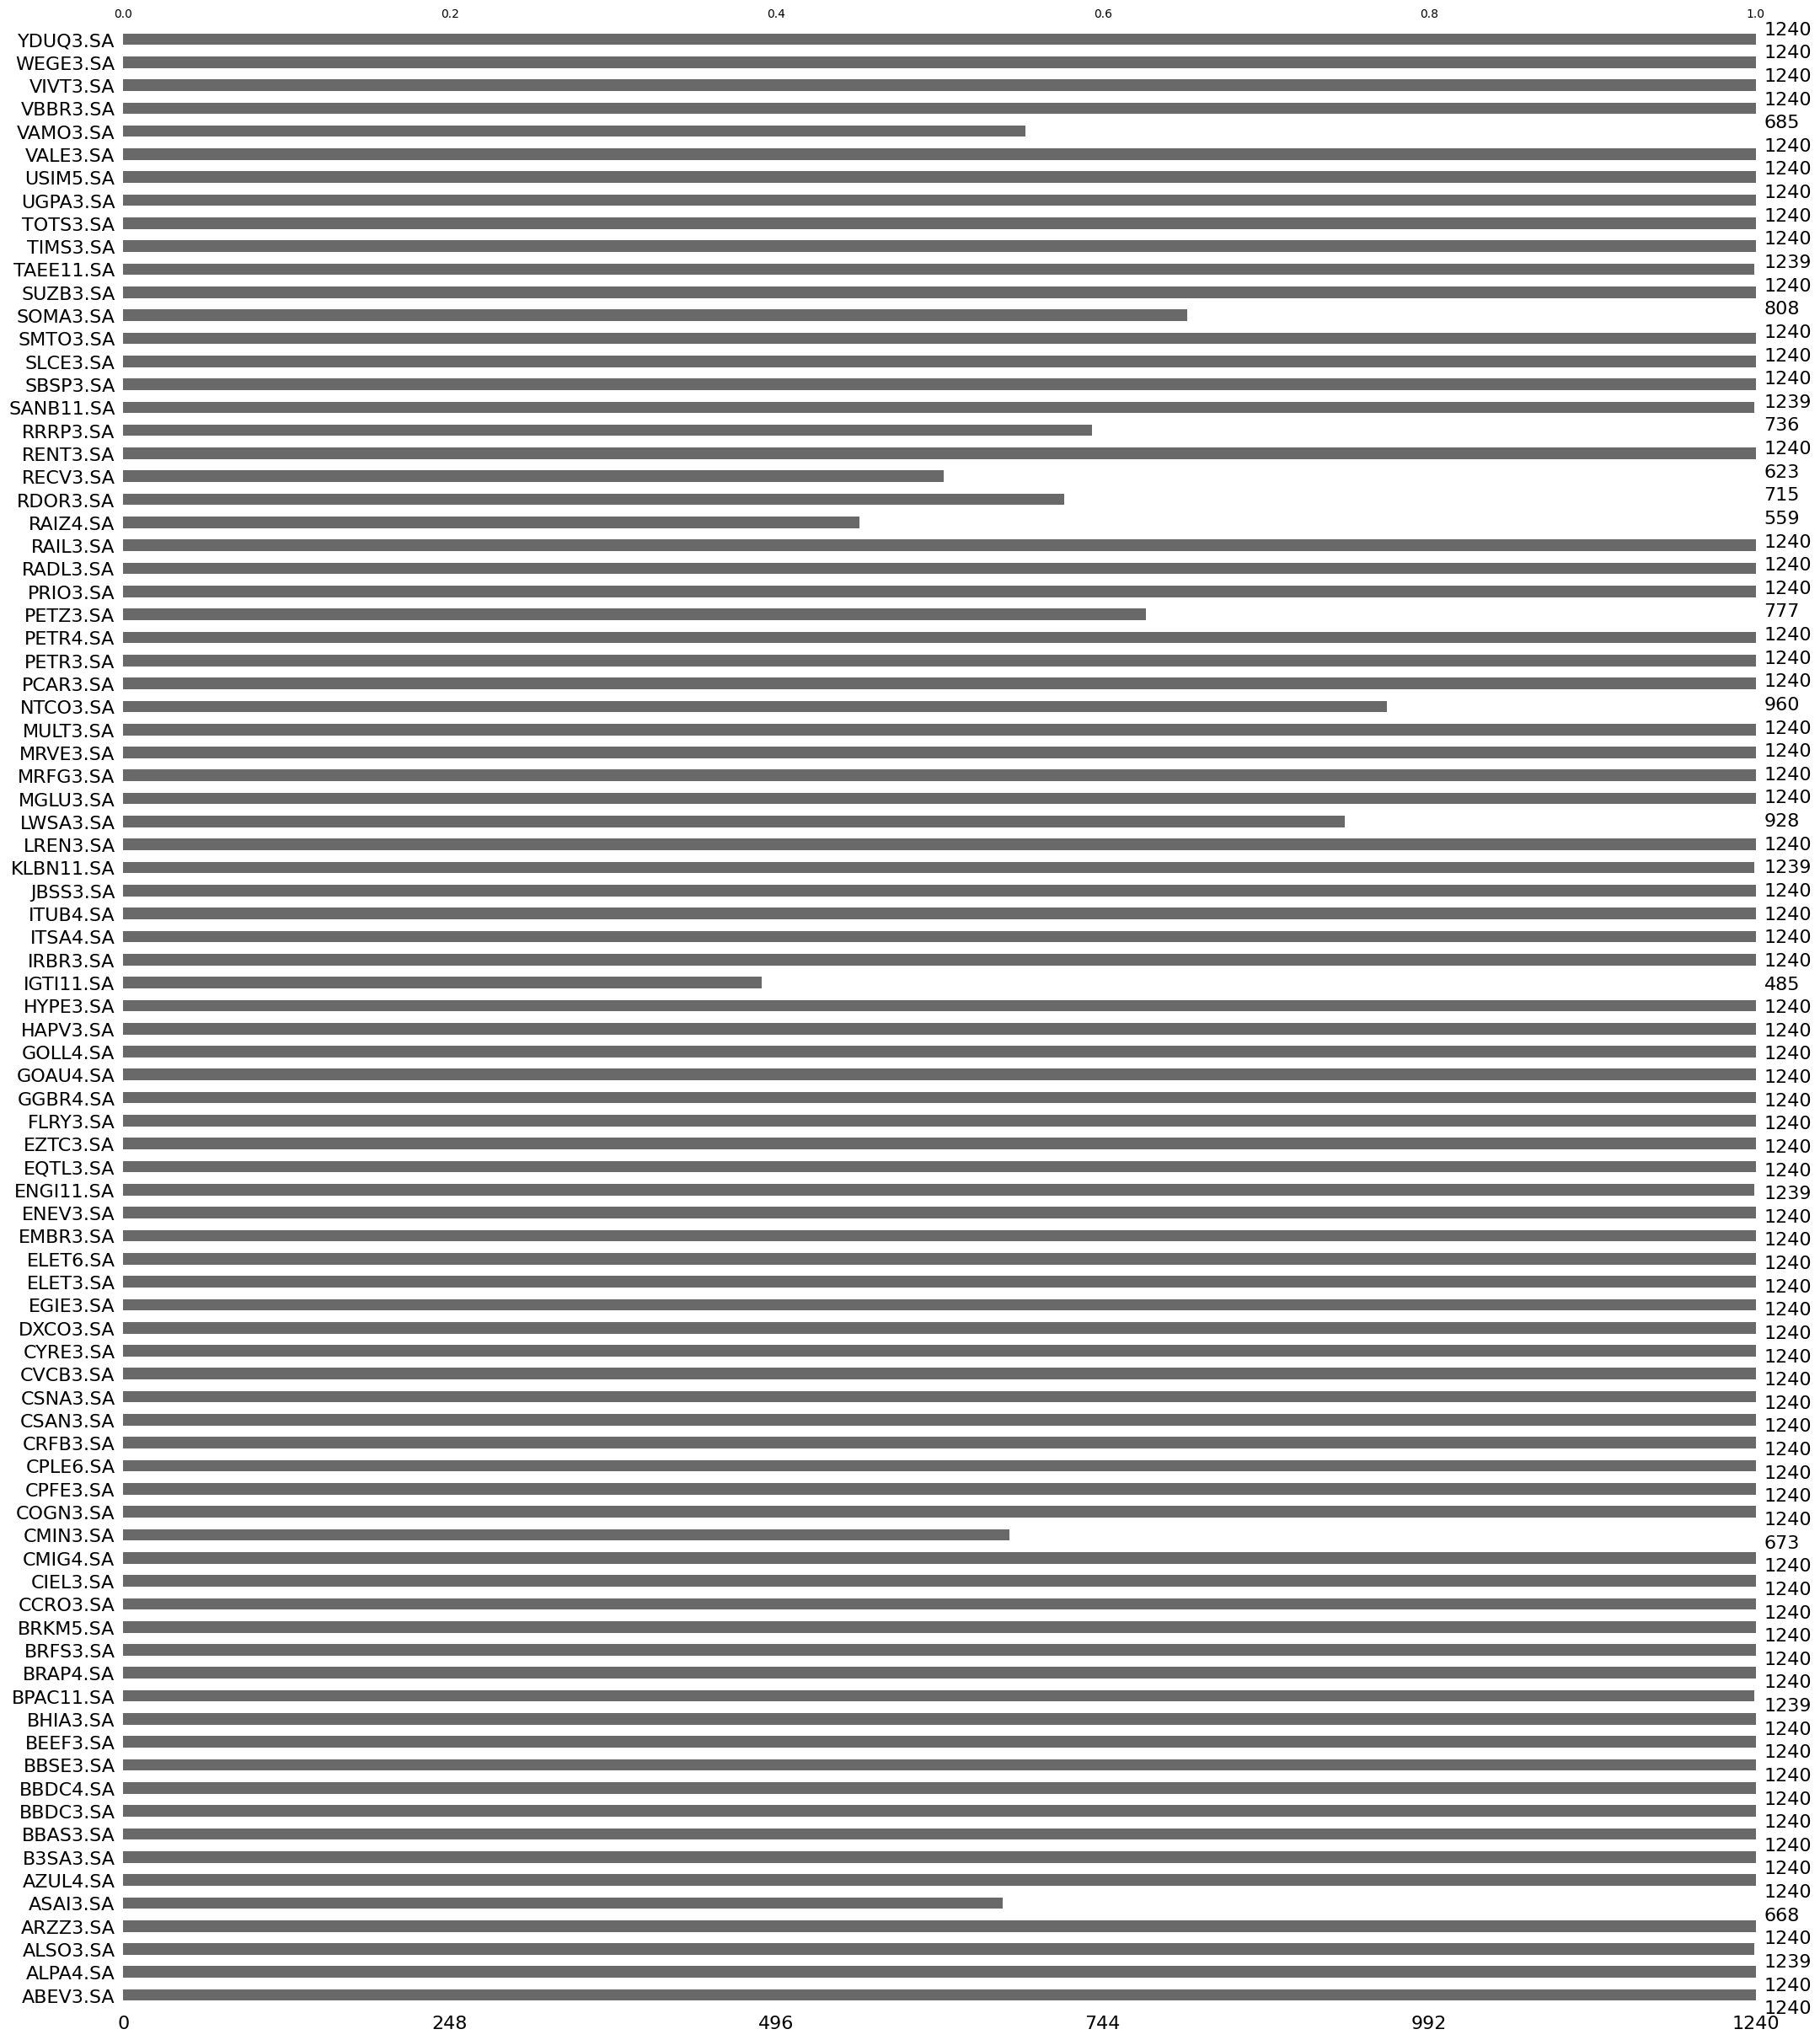

In [324]:
msno.bar(adjclose_ibov)

<Axes: >

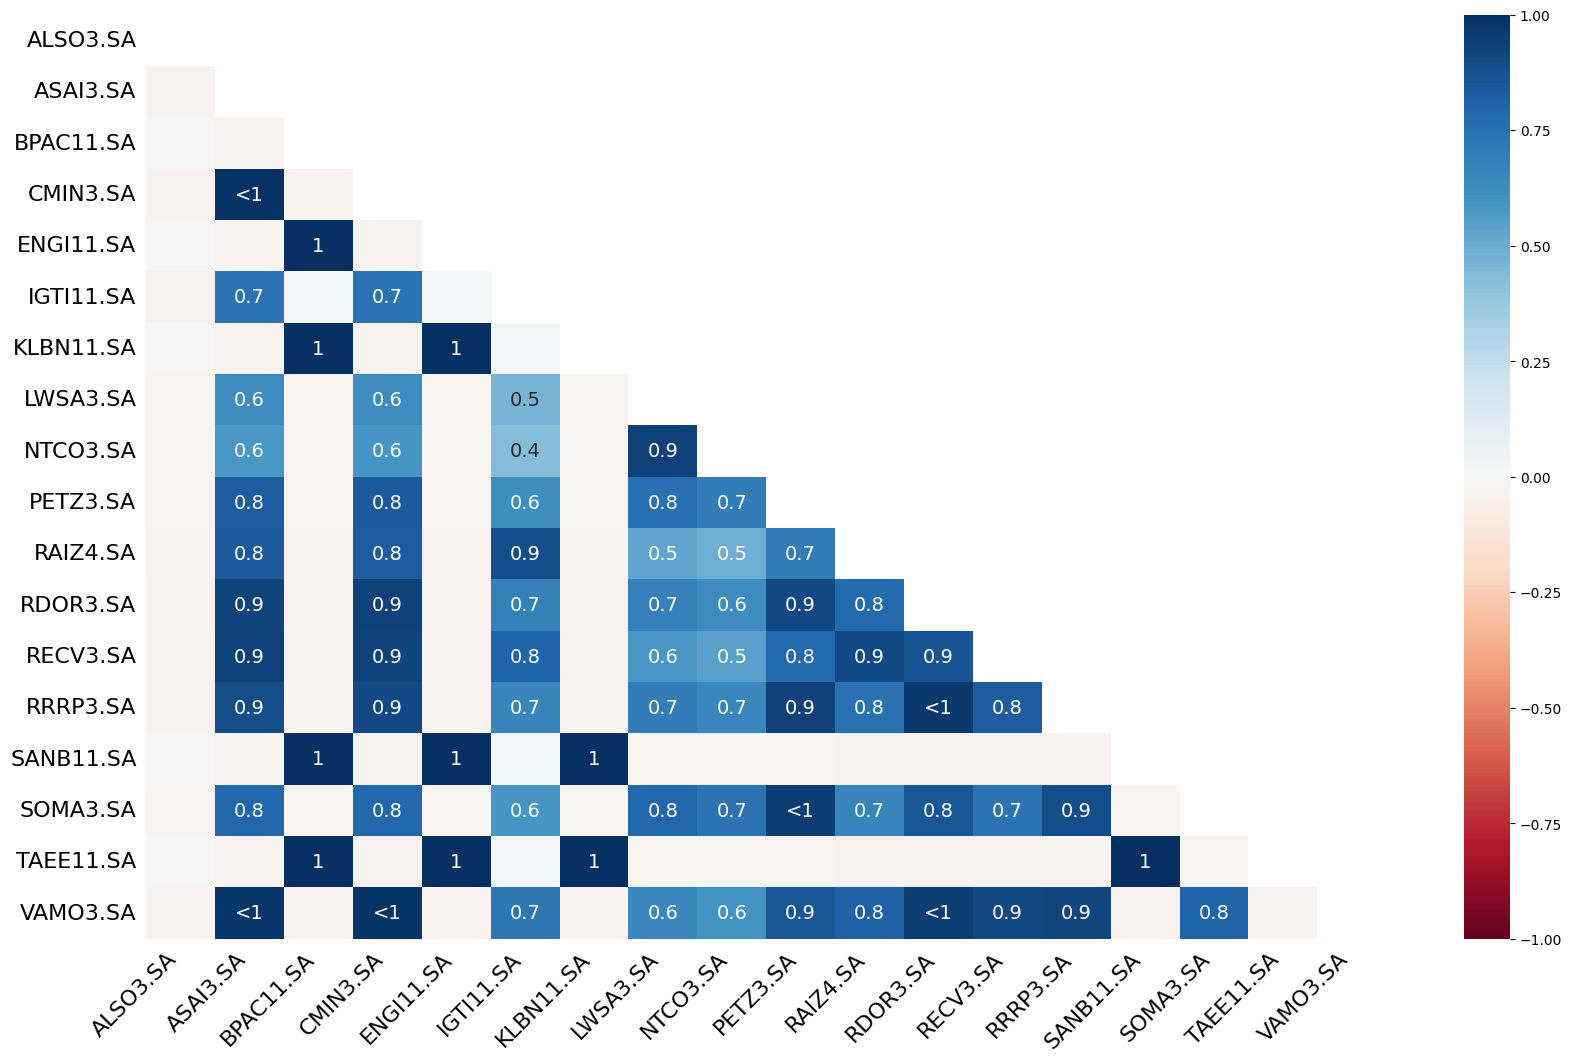

In [325]:
msno.heatmap(adjclose_ibov)

In [419]:
cotacoes_ibov_copy = cotacoes_ibov.copy()
cotacoes_ibov_copy

Adj Close                                                       \
             ABEV3.SA   ALPA4.SA   ALSO3.SA   ARZZ3.SA ASAI3.SA   AZUL4.SA   
Date                                                                         
2018-10-30  13.584669  11.999656  21.389858  43.114426      NaN  30.959999   
2018-10-31  13.830126  11.999656  21.371235  43.481358      NaN  30.590000   
2018-11-01  13.855517  12.363043  21.883398  44.426208      NaN  31.639999   
2018-11-05  13.931691  12.173449  21.436420  43.343761      NaN  32.549999   
2018-11-06  14.084044  12.378842  22.013767  43.114426      NaN  31.650000   
...               ...        ...        ...        ...      ...        ...   
2023-10-24  12.520000   7.830000  23.330000  60.520000    11.38  13.200000   
2023-10-25  12.440000   7.790000  23.330000  59.119999    11.03  12.850000   
2023-10-26  12.630000   8.020000  23.330000  61.099998    11.70  13.360000   
2023-10-27  12.290000   7.780000  23.129999  58.799999    11.13  12.790000   
2023-10-30  12.360000   7.880000        NaN  57.759998    10.96  12.430000   

                                                        ...   Volume           \
             B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ... TIMS3.SA TOTS3.SA   
Date                                                    ...                     
2018-10-30   7.381192  31.349602  14.948955  17.185909  ...  9703900  1920642   
2018-10-31   7.420334  31.095024  14.870303  16.963362  ...  9116900  2827161   
2018-11-01   7.671966  31.553253  15.651919  17.932692  ...  6368500  1957011   
2018-11-05   7.618844  31.575087  16.230936  18.318144  ...  9284200  3329714   
2018-11-06   7.509803  30.891348  15.950579  18.120214  ...  9616000  2376306   
...               ...        ...        ...        ...  ...      ...      ...   
2023-10-24  11.600000  49.040001  12.490000  14.180000  ...  4080800  3735600   
2023-10-25  11.540000  49.049999  12.410000  14.140000  ...  4128400  3956600   
2023-10-26  11.730000  50.070000  12.700000  14.500000  ...  5887100  3587800   
2023-10-27  11.200000  48.799999  12.490000  14.350000  ...  9745300  3071100   
2023-10-30  11.080000  48.459999  12.390000  14.190000  ...        0        0   

                                                                        \
            UGPA3.SA  USIM5.SA  VALE3.SA    VAMO3.SA VBBR3.SA VIVT3.SA   
Date                                                                     
2018-10-30   9910800  22554300  23799200         NaN  5091900   112400   
2018-10-31  10728200  22624300  26626000         NaN  4171300    17500   
2018-11-01   4810400  18909200  20420000         NaN  5020100    25400   
2018-11-05  11012400  12802200  15491800         NaN  5231900    15700   
2018-11-06   5947400  11008400  11211000         NaN  5420600     5400   
...              ...       ...       ...         ...      ...      ...   
2023-10-24   6695200  10958300  21768800   8443800.0  6328600  2111300   
2023-10-25   4952600  11505800  26091800  13622500.0  6258200  1620800   
2023-10-26   9456200  10199500  30936700   6790200.0  9299500  3252300   
2023-10-27   4648900  27125500  47989100   5750900.0  5754900  2805300   
2023-10-30         0         0         0         0.0        0        0   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2018-10-30  10193400  4196200  
2018-10-31  10170200  3164900  
2018-11-01   8679200  3622200  
2018-11-05   7289600  3079700  
2018-11-06   6576200  3036800  
...              ...      ...  
2023-10-24   9893700  5451600  
2023-10-25  43128700  5141500  
2023-10-26  19917500  3632900  
2023-10-27  13106900  4291500  
2023-10-30         0        0  

[1240 rows x 516 columns]

In [420]:
cotacoes_ibov_wide_to_long = pd.melt(cotacoes_ibov_copy, ignore_index=False)
cotacoes_ibov_wide_to_long

,variable_0,variable_1,value
Date,,,
2018-10-30,Adj Close,ABEV3.SA,1.358467e+01
2018-10-31,Adj Close,ABEV3.SA,1.383013e+01
2018-11-01,Adj Close,ABEV3.SA,1.385552e+01
2018-11-05,Adj Close,ABEV3.SA,1.393169e+01
2018-11-06,Adj Close,ABEV3.SA,1.408404e+01
...,...,...,...
2023-10-24,Volume,YDUQ3.SA,5.451600e+06
2023-10-25,Volume,YDUQ3.SA,5.141500e+06
2023-10-26,Volume,YDUQ3.SA,3.632900e+06


In [421]:
cotacoes_ibov_wide_to_long.columns = ['Parametro', 'Ativo', 'Valor']
cotacoes_ibov_wide_to_long

,Parametro,Ativo,Valor
Date,,,
2018-10-30,Adj Close,ABEV3.SA,1.358467e+01
2018-10-31,Adj Close,ABEV3.SA,1.383013e+01
2018-11-01,Adj Close,ABEV3.SA,1.385552e+01
2018-11-05,Adj Close,ABEV3.SA,1.393169e+01
2018-11-06,Adj Close,ABEV3.SA,1.408404e+01
...,...,...,...
2023-10-24,Volume,YDUQ3.SA,5.451600e+06
2023-10-25,Volume,YDUQ3.SA,5.141500e+06
2023-10-26,Volume,YDUQ3.SA,3.632900e+06


In [422]:
cotacoes_ibov_wide_to_long_copy = cotacoes_ibov_wide_to_long.copy()

In [423]:
#cotacoes_ibov_wide_to_long_copy.Ativo = cotacoes_ibov_wide_to_long_copy.Ativo.str.replace('.SA', '')
#cotacoes_ibov_wide_to_long_copy.Ativo = cotacoes_ibov_wide_to_long_copy.Ativo.str.replace('.SA', '', regex=False)
cotacoes_ibov_wide_to_long_copy.Ativo = cotacoes_ibov_wide_to_long_copy.Ativo.replace(r'.SA$', '', regex=True)
#cotacoes_ibov_wide_to_long_copy.Ativo = cotacoes_ibov_wide_to_long_copy.Ativo.replace('^BBAS', 'BBSE', regex=True)
set(cotacoes_ibov_wide_to_long_copy.Ativo)

{'ABEV3',
 'ALPA4',
 'ALSO3',
 'ARZZ3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BBAS3',
 'BBDC3',
 'BBDC4',
 'BBSE3',
 'BEEF3',
 'BHIA3',
 'BPAC11',
 'BRAP4',
 'BRFS3',
 'BRKM5',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'CMIN3',
 'COGN3',
 'CPFE3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'EGIE3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENEV3',
 'ENGI11',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'KLBN11',
 'LREN3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'MULT3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PETZ3',
 'PRIO3',
 'RADL3',
 'RAIL3',
 'RAIZ4',
 'RDOR3',
 'RECV3',
 'RENT3',
 'RRRP3',
 'SANB11',
 'SBSP3',
 'SLCE3',
 'SMTO3',
 'SOMA3',
 'SUZB3',
 'TAEE11',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VAMO3',
 'VBBR3',
 'VIVT3',
 'WEGE3',
 'YDUQ3'}

In [389]:
cotacoes_ibov_wide_to_long_abev = cotacoes_ibov_wide_to_long[(cotacoes_ibov_wide_to_long['Parametro'] == 'Close') & (cotacoes_ibov_wide_to_long['Ativo'] == 'ABEV3')]
cotacoes_ibov_wide_to_long_abev

,Parametro,Ativo,Valor
Date,,,
2018-10-30,Close,ABEV3,16.049999
2018-10-31,Close,ABEV3,16.340000
2018-11-01,Close,ABEV3,16.370001
2018-11-05,Close,ABEV3,16.459999
2018-11-06,Close,ABEV3,16.639999
...,...,...,...
2023-10-24,Close,ABEV3,12.520000
2023-10-25,Close,ABEV3,12.440000
2023-10-26,Close,ABEV3,12.630000


In [424]:
cotacoes_ibov_long_to_wide = cotacoes_ibov_wide_to_long.pivot(columns=['Parametro', 'Ativo'], values='Valor')
cotacoes_ibov_long_to_wide

Parametro   Adj Close                                                       \
Ativo        ABEV3.SA   ALPA4.SA   ALSO3.SA   ARZZ3.SA ASAI3.SA   AZUL4.SA   
Date                                                                         
2018-10-30  13.584669  11.999656  21.389858  43.114426      NaN  30.959999   
2018-10-31  13.830126  11.999656  21.371235  43.481358      NaN  30.590000   
2018-11-01  13.855517  12.363043  21.883398  44.426208      NaN  31.639999   
2018-11-05  13.931691  12.173449  21.436420  43.343761      NaN  32.549999   
2018-11-06  14.084044  12.378842  22.013767  43.114426      NaN  31.650000   
...               ...        ...        ...        ...      ...        ...   
2023-10-24  12.520000   7.830000  23.330000  60.520000    11.38  13.200000   
2023-10-25  12.440000   7.790000  23.330000  59.119999    11.03  12.850000   
2023-10-26  12.630000   8.020000  23.330000  61.099998    11.70  13.360000   
2023-10-27  12.290000   7.780000  23.129999  58.799999    11.13  12.790000   
2023-10-30  12.360000   7.880000        NaN  57.759998    10.96  12.430000   

Parametro                                               ...     Volume  \
Ativo        B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...   TIMS3.SA   
Date                                                    ...              
2018-10-30   7.381192  31.349602  14.948955  17.185909  ...  9703900.0   
2018-10-31   7.420334  31.095024  14.870303  16.963362  ...  9116900.0   
2018-11-01   7.671966  31.553253  15.651919  17.932692  ...  6368500.0   
2018-11-05   7.618844  31.575087  16.230936  18.318144  ...  9284200.0   
2018-11-06   7.509803  30.891348  15.950579  18.120214  ...  9616000.0   
...               ...        ...        ...        ...  ...        ...   
2023-10-24  11.600000  49.040001  12.490000  14.180000  ...  4080800.0   
2023-10-25  11.540000  49.049999  12.410000  14.140000  ...  4128400.0   
2023-10-26  11.730000  50.070000  12.700000  14.500000  ...  5887100.0   
2023-10-27  11.200000  48.799999  12.490000  14.350000  ...  9745300.0   
2023-10-30  11.080000  48.459999  12.390000  14.190000  ...        0.0   

Parametro                                                              \
Ativo        TOTS3.SA    UGPA3.SA    USIM5.SA    VALE3.SA    VAMO3.SA   
Date                                                                    
2018-10-30  1920642.0   9910800.0  22554300.0  23799200.0         NaN   
2018-10-31  2827161.0  10728200.0  22624300.0  26626000.0         NaN   
2018-11-01  1957011.0   4810400.0  18909200.0  20420000.0         NaN   
2018-11-05  3329714.0  11012400.0  12802200.0  15491800.0         NaN   
2018-11-06  2376306.0   5947400.0  11008400.0  11211000.0         NaN   
...               ...         ...         ...         ...         ...   
2023-10-24  3735600.0   6695200.0  10958300.0  21768800.0   8443800.0   
2023-10-25  3956600.0   4952600.0  11505800.0  26091800.0  13622500.0   
2023-10-26  3587800.0   9456200.0  10199500.0  30936700.0   6790200.0   
2023-10-27  3071100.0   4648900.0  27125500.0  47989100.0   5750900.0   
2023-10-30        0.0         0.0         0.0         0.0         0.0   

Parametro                                                
Ativo        VBBR3.SA   VIVT3.SA    WEGE3.SA   YDUQ3.SA  
Date                                                     
2018-10-30  5091900.0   112400.0  10193400.0  4196200.0  
2018-10-31  4171300.0    17500.0  10170200.0  3164900.0  
2018-11-01  5020100.0    25400.0   8679200.0  3622200.0  
2018-11-05  5231900.0    15700.0   7289600.0  3079700.0  
2018-11-06  5420600.0     5400.0   6576200.0  3036800.0  
...               ...        ...         ...        ...  
2023-10-24  6328600.0  2111300.0   9893700.0  5451600.0  
2023-10-25  6258200.0  1620800.0  43128700.0  5141500.0  
2023-10-26  9299500.0  3252300.0  19917500.0  3632900.0  
2023-10-27  5754900.0  2805300.0  13106900.0  4291500.0  
2023-10-30        0.0        0.0         0.0        0.0  

[1240 rows x 516 columns]

In [417]:
cotacoes_ibov_wide_to_long.Ativo = cotacoes_ibov_wide_to_long.Ativo.replace(r'.SA$', '', regex=True)
set(cotacoes_ibov_wide_to_long.Ativo)

{'ABEV3',
 'ALPA4',
 'ALSO3',
 'ARZZ3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BBAS3',
 'BBDC3',
 'BBDC4',
 'BBSE3',
 'BEEF3',
 'BHIA3',
 'BPAC11',
 'BRAP4',
 'BRFS3',
 'BRKM5',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'CMIN3',
 'COGN3',
 'CPFE3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'EGIE3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENEV3',
 'ENGI11',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'KLBN11',
 'LREN3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'MULT3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PETZ3',
 'PRIO3',
 'RADL3',
 'RAIL3',
 'RAIZ4',
 'RDOR3',
 'RECV3',
 'RENT3',
 'RRRP3',
 'SANB11',
 'SBSP3',
 'SLCE3',
 'SMTO3',
 'SOMA3',
 'SUZB3',
 'TAEE11',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VAMO3',
 'VBBR3',
 'VIVT3',
 'WEGE3',
 'YDUQ3'}

In [418]:
df_cotacoes = cotacoes_ibov_wide_to_long.copy()
df_cotacoes

,Parametro,Ativo,Valor
Date,,,
2018-10-30,Adj Close,ABEV3,1.358467e+01
2018-10-31,Adj Close,ABEV3,1.383013e+01
2018-11-01,Adj Close,ABEV3,1.385552e+01
2018-11-05,Adj Close,ABEV3,1.393169e+01
2018-11-06,Adj Close,ABEV3,1.408404e+01
...,...,...,...
2023-10-24,Volume,YDUQ3,5.451600e+06
2023-10-25,Volume,YDUQ3,5.141500e+06
2023-10-26,Volume,YDUQ3,3.632900e+06


In [426]:
df_cotacoes_adjclose = df_cotacoes[df_cotacoes.Parametro == 'Adj Close']
df_cotacoes_adjclose

,Parametro,Ativo,Valor
Date,,,
2018-10-30,Adj Close,ABEV3,13.584669
2018-10-31,Adj Close,ABEV3,13.830126
2018-11-01,Adj Close,ABEV3,13.855517
2018-11-05,Adj Close,ABEV3,13.931691
2018-11-06,Adj Close,ABEV3,14.084044
...,...,...,...
2023-10-24,Adj Close,YDUQ3,18.549999
2023-10-25,Adj Close,YDUQ3,18.290001
2023-10-26,Adj Close,YDUQ3,18.780001


In [427]:
df_cotacoes_lowcost_2021 = df_cotacoes[(df_cotacoes.Parametro == 'Adj Close') & (df_cotacoes.Valor < 10)]
df_cotacoes_lowcost_2021

,Parametro,Ativo,Valor
Date,,,
2020-03-16,Adj Close,ABEV3,9.777992
2020-03-18,Adj Close,ABEV3,9.919830
2020-04-24,Adj Close,ABEV3,9.848911
2020-05-13,Adj Close,ABEV3,9.981885
2023-02-10,Adj Close,ALPA4,9.580000
...,...,...,...
2023-05-03,Adj Close,YDUQ3,8.069947
2023-05-04,Adj Close,YDUQ3,8.465049
2023-05-05,Adj Close,YDUQ3,9.156477


In [428]:
set(df_cotacoes_lowcost_2021.Ativo)

{'ABEV3',
 'ALPA4',
 'AZUL4',
 'B3SA3',
 'BEEF3',
 'BHIA3',
 'BPAC11',
 'BRFS3',
 'BRKM5',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'CMIN3',
 'COGN3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'EMBR3',
 'ENEV3',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'ITSA4',
 'JBSS3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PETZ3',
 'PRIO3',
 'RAIZ4',
 'SOMA3',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VAMO3',
 'WEGE3',
 'YDUQ3'}

In [429]:
df_cotacoes_lowcost_2021_8_10 = df_cotacoes[(df_cotacoes.Parametro == 'Adj Close') & (df_cotacoes.Valor < 10) & (df_cotacoes.Valor > 8)]
df_cotacoes_lowcost_2021_8_10

,Parametro,Ativo,Valor
Date,,,
2020-03-16,Adj Close,ABEV3,9.777992
2020-03-18,Adj Close,ABEV3,9.919830
2020-04-24,Adj Close,ABEV3,9.848911
2020-05-13,Adj Close,ABEV3,9.981885
2023-02-10,Adj Close,ALPA4,9.580000
...,...,...,...
2023-05-03,Adj Close,YDUQ3,8.069947
2023-05-04,Adj Close,YDUQ3,8.465049
2023-05-05,Adj Close,YDUQ3,9.156477


In [430]:
set(df_cotacoes_lowcost_2021_8_10.Ativo)

{'ABEV3',
 'ALPA4',
 'AZUL4',
 'B3SA3',
 'BEEF3',
 'BHIA3',
 'BPAC11',
 'BRFS3',
 'BRKM5',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'COGN3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'EMBR3',
 'ENEV3',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'ITSA4',
 'JBSS3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PETZ3',
 'PRIO3',
 'SOMA3',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VAMO3',
 'WEGE3',
 'YDUQ3'}

In [431]:
set(df_cotacoes[(df_cotacoes.Parametro == 'Adj Close') & (df_cotacoes.Valor < 10) & (df_cotacoes.Valor > 8)].Ativo)

{'ABEV3',
 'ALPA4',
 'AZUL4',
 'B3SA3',
 'BEEF3',
 'BHIA3',
 'BPAC11',
 'BRFS3',
 'BRKM5',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'COGN3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'EMBR3',
 'ENEV3',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'ITSA4',
 'JBSS3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PETZ3',
 'PRIO3',
 'SOMA3',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VAMO3',
 'WEGE3',
 'YDUQ3'}

In [432]:
df_cotacoes

,Parametro,Ativo,Valor
Date,,,
2018-10-30,Adj Close,ABEV3,1.358467e+01
2018-10-31,Adj Close,ABEV3,1.383013e+01
2018-11-01,Adj Close,ABEV3,1.385552e+01
2018-11-05,Adj Close,ABEV3,1.393169e+01
2018-11-06,Adj Close,ABEV3,1.408404e+01
...,...,...,...
2023-10-24,Volume,YDUQ3,5.451600e+06
2023-10-25,Volume,YDUQ3,5.141500e+06
2023-10-26,Volume,YDUQ3,3.632900e+06


In [434]:
df_cotacoes[(df_cotacoes.Valor) > (df_cotacoes[(df_cotacoes.Parametro == 'Volume') & (df_cotacoes.Ativo == 'PETR4')].Valor.mean())]

,Parametro,Ativo,Valor
Date,,,
2019-01-11,Volume,ABEV3,73632000.0
2019-07-25,Volume,ABEV3,75250600.0
2019-10-25,Volume,ABEV3,82318800.0
2019-12-03,Volume,ABEV3,97511800.0
2020-02-07,Volume,ABEV3,77239000.0
...,...,...,...
2022-10-07,Volume,VALE3,83593200.0
2022-11-11,Volume,VALE3,80174100.0
2023-05-31,Volume,VALE3,103408900.0


In [436]:
set(df_cotacoes[(df_cotacoes.Valor) > (df_cotacoes[(df_cotacoes.Parametro == 'Volume') & (df_cotacoes.Ativo == 'PETR4')].Valor.mean())].Ativo)

{'ABEV3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BBAS3',
 'BBDC4',
 'BHIA3',
 'BPAC11',
 'BRFS3',
 'CCRO3',
 'CIEL3',
 'CMIN3',
 'COGN3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CVCB3',
 'ELET3',
 'EMBR3',
 'ENEV3',
 'HAPV3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'LWSA3',
 'MGLU3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PRIO3',
 'RAIZ4',
 'USIM5',
 'VALE3',
 'VBBR3'}

In [439]:
df_cotacoes[(df_cotacoes.Parametro == 'Adj Close') & ((df_cotacoes.Valor < 10) | (df_cotacoes.Valor > 80))]

,Parametro,Ativo,Valor
Date,,,
2020-03-16,Adj Close,ABEV3,9.777992
2020-03-18,Adj Close,ABEV3,9.919830
2020-04-24,Adj Close,ABEV3,9.848911
2020-05-13,Adj Close,ABEV3,9.981885
2023-02-10,Adj Close,ALPA4,9.580000
...,...,...,...
2023-05-03,Adj Close,YDUQ3,8.069947
2023-05-04,Adj Close,YDUQ3,8.465049
2023-05-05,Adj Close,YDUQ3,9.156477


In [440]:
ativos_churrasco = ['ABEV3', 'JBSS3', 'CRFB3', 'KLBN11', 'RADL3', ]

In [441]:
df_cotacoes_churrasco = df_cotacoes[df_cotacoes.Ativo.isin(ativos_churrasco)]
df_cotacoes_churrasco

,Parametro,Ativo,Valor
Date,,,
2018-10-30,Adj Close,ABEV3,1.358467e+01
2018-10-31,Adj Close,ABEV3,1.383013e+01
2018-11-01,Adj Close,ABEV3,1.385552e+01
2018-11-05,Adj Close,ABEV3,1.393169e+01
2018-11-06,Adj Close,ABEV3,1.408404e+01
...,...,...,...
2023-10-24,Volume,RADL3,4.677400e+06
2023-10-25,Volume,RADL3,5.820000e+06
2023-10-26,Volume,RADL3,3.874100e+06


In [442]:
alguns_bancos = ['ITUB4', 'BBDC4', 'BBAS3', 'SANB11', 'BIDI11', ]

In [444]:
df_cotacoes_sem_bancos = df_cotacoes[~df_cotacoes.Ativo.isin(alguns_bancos)]
df_cotacoes_sem_bancos

,Parametro,Ativo,Valor
Date,,,
2018-10-30,Adj Close,ABEV3,1.358467e+01
2018-10-31,Adj Close,ABEV3,1.383013e+01
2018-11-01,Adj Close,ABEV3,1.385552e+01
2018-11-05,Adj Close,ABEV3,1.393169e+01
2018-11-06,Adj Close,ABEV3,1.408404e+01
...,...,...,...
2023-10-24,Volume,YDUQ3,5.451600e+06
2023-10-25,Volume,YDUQ3,5.141500e+06
2023-10-26,Volume,YDUQ3,3.632900e+06


In [445]:
set(df_cotacoes_sem_bancos.Ativo)

{'ABEV3',
 'ALPA4',
 'ALSO3',
 'ARZZ3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BBDC3',
 'BBSE3',
 'BEEF3',
 'BHIA3',
 'BPAC11',
 'BRAP4',
 'BRFS3',
 'BRKM5',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'CMIN3',
 'COGN3',
 'CPFE3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'EGIE3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENEV3',
 'ENGI11',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'JBSS3',
 'KLBN11',
 'LREN3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'MULT3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PETZ3',
 'PRIO3',
 'RADL3',
 'RAIL3',
 'RAIZ4',
 'RDOR3',
 'RECV3',
 'RENT3',
 'RRRP3',
 'SBSP3',
 'SLCE3',
 'SMTO3',
 'SOMA3',
 'SUZB3',
 'TAEE11',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VAMO3',
 'VBBR3',
 'VIVT3',
 'WEGE3',
 'YDUQ3'}

In [446]:
ibov_date_range = pd.date_range(start='21-03-21', end='2021-03-31')
ibov_date_range

DatetimeIndex(['2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29', '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', freq='D')

In [447]:
df_cotacoes[df_cotacoes.index.isin(ibov_date_range)]

,Parametro,Ativo,Valor
Date,,,
2021-03-22,Adj Close,ABEV3,1.420771e+01
2021-03-23,Adj Close,ABEV3,1.378714e+01
2021-03-24,Adj Close,ABEV3,1.353115e+01
2021-03-25,Adj Close,ABEV3,1.370486e+01
2021-03-26,Adj Close,ABEV3,1.385114e+01
...,...,...,...
2021-03-25,Volume,YDUQ3,2.433000e+06
2021-03-26,Volume,YDUQ3,1.801000e+06
2021-03-29,Volume,YDUQ3,1.223600e+06


In [448]:
acao = 'PETR4.SA'

In [449]:
acao[-4]

'4'

In [450]:
df_cotacoes

,Parametro,Ativo,Valor
Date,,,
2018-10-30,Adj Close,ABEV3,1.358467e+01
2018-10-31,Adj Close,ABEV3,1.383013e+01
2018-11-01,Adj Close,ABEV3,1.385552e+01
2018-11-05,Adj Close,ABEV3,1.393169e+01
2018-11-06,Adj Close,ABEV3,1.408404e+01
...,...,...,...
2023-10-24,Volume,YDUQ3,5.451600e+06
2023-10-25,Volume,YDUQ3,5.141500e+06
2023-10-26,Volume,YDUQ3,3.632900e+06


In [452]:
df_cotacoes.Ativo.str[-1]

Date
2018-10-30    3
2018-10-31    3
2018-11-01    3
2018-11-05    3
2018-11-06    3
             ..
2023-10-24    3
2023-10-25    3
2023-10-26    3
2023-10-27    3
2023-10-30    3
Name: Ativo, Length: 639840, dtype: object

In [453]:
df_cotacoes[df_cotacoes.Ativo.str[-1] == '3']

,Parametro,Ativo,Valor
Date,,,
2018-10-30,Adj Close,ABEV3,1.358467e+01
2018-10-31,Adj Close,ABEV3,1.383013e+01
2018-11-01,Adj Close,ABEV3,1.385552e+01
2018-11-05,Adj Close,ABEV3,1.393169e+01
2018-11-06,Adj Close,ABEV3,1.408404e+01
...,...,...,...
2023-10-24,Volume,YDUQ3,5.451600e+06
2023-10-25,Volume,YDUQ3,5.141500e+06
2023-10-26,Volume,YDUQ3,3.632900e+06


In [454]:
set(df_cotacoes[df_cotacoes.Ativo.str[-1] == '3'].Ativo)

{'ABEV3',
 'ALSO3',
 'ARZZ3',
 'ASAI3',
 'B3SA3',
 'BBAS3',
 'BBDC3',
 'BBSE3',
 'BEEF3',
 'BHIA3',
 'BRFS3',
 'CCRO3',
 'CIEL3',
 'CMIN3',
 'COGN3',
 'CPFE3',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'EGIE3',
 'ELET3',
 'EMBR3',
 'ENEV3',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'HAPV3',
 'HYPE3',
 'IRBR3',
 'JBSS3',
 'LREN3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'MULT3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETZ3',
 'PRIO3',
 'RADL3',
 'RAIL3',
 'RDOR3',
 'RECV3',
 'RENT3',
 'RRRP3',
 'SBSP3',
 'SLCE3',
 'SMTO3',
 'SOMA3',
 'SUZB3',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'VALE3',
 'VAMO3',
 'VBBR3',
 'VIVT3',
 'WEGE3',
 'YDUQ3'}

In [455]:
set(df_cotacoes.Ativo[df_cotacoes.Ativo.str[-1] == '4'])

{'ALPA4',
 'AZUL4',
 'BBDC4',
 'BRAP4',
 'CMIG4',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'ITSA4',
 'ITUB4',
 'PETR4',
 'RAIZ4'}

In [456]:
df_cotacoes.sort_index()

,Parametro,Ativo,Valor
Date,,,
2018-10-30,Adj Close,ABEV3,13.584669
2018-10-30,Open,CSAN3,8.245000
2018-10-30,High,EMBR3,20.750000
2018-10-30,Open,CSNA3,8.990000
2018-10-30,High,ELET6,26.250000
...,...,...,...
2023-10-30,Open,AZUL4,0.000000
2023-10-30,Open,B3SA3,0.000000
2023-10-30,Open,BBAS3,0.000000


In [457]:
df_cotacoes.sort_index(ascending=False)

,Parametro,Ativo,Valor
Date,,,
2023-10-30,Volume,YDUQ3,0.000000
2023-10-30,Low,KLBN11,0.000000
2023-10-30,Low,MGLU3,0.000000
2023-10-30,Low,LWSA3,0.000000
2023-10-30,Volume,KLBN11,0.000000
...,...,...,...
2018-10-30,Open,AZUL4,29.059999
2018-10-30,Open,B3SA3,8.526666
2018-10-30,Open,BBAS3,42.619999


In [458]:
df_cotacoes.sort_values('Ativo')

,Parametro,Ativo,Valor
Date,,,
2018-10-30,Adj Close,ABEV3,13.584669
2022-02-25,Open,ABEV3,14.680000
2022-03-02,Open,ABEV3,14.690000
2022-03-03,Open,ABEV3,14.510000
2022-03-04,Open,ABEV3,14.210000
...,...,...,...
2020-07-09,Low,YDUQ3,34.549999
2020-07-10,Low,YDUQ3,34.410000
2020-07-13,Low,YDUQ3,33.980000


In [459]:
df_cotacoes.sort_values('Ativo', ascending=False)

,Parametro,Ativo,Valor
Date,,,
2023-10-30,Volume,YDUQ3,0.000000
2020-07-10,Low,YDUQ3,34.410000
2020-06-22,Low,YDUQ3,34.709999
2020-06-23,Low,YDUQ3,35.529999
2020-06-24,Low,YDUQ3,34.950001
...,...,...,...
2018-11-06,Open,ABEV3,16.320000
2018-11-07,Open,ABEV3,16.719999
2018-11-08,Open,ABEV3,16.400000


In [460]:
df_cotacoes.sort_values(['Ativo', 'Parametro'], ascending=True)

,Parametro,Ativo,Valor
Date,,,
2018-10-30,Adj Close,ABEV3,1.358467e+01
2018-10-31,Adj Close,ABEV3,1.383013e+01
2018-11-01,Adj Close,ABEV3,1.385552e+01
2018-11-05,Adj Close,ABEV3,1.393169e+01
2018-11-06,Adj Close,ABEV3,1.408404e+01
...,...,...,...
2023-10-24,Volume,YDUQ3,5.451600e+06
2023-10-25,Volume,YDUQ3,5.141500e+06
2023-10-26,Volume,YDUQ3,3.632900e+06


In [461]:
df_volume = df_cotacoes[df_cotacoes.Parametro == 'Volume']
df_volume

,Parametro,Ativo,Valor
Date,,,
2018-10-30,Volume,ABEV3,34851100.0
2018-10-31,Volume,ABEV3,27263000.0
2018-11-01,Volume,ABEV3,22441600.0
2018-11-05,Volume,ABEV3,19580700.0
2018-11-06,Volume,ABEV3,18079800.0
...,...,...,...
2023-10-24,Volume,YDUQ3,5451600.0
2023-10-25,Volume,YDUQ3,5141500.0
2023-10-26,Volume,YDUQ3,3632900.0


In [462]:
df_volume.nlargest(10, 'Valor')

,Parametro,Ativo,Valor
Date,,,
2023-03-09,Volume,HAPV3,553080600.0
2019-06-14,Volume,BHIA3,539987500.0
2022-11-09,Volume,BBDC4,499194800.0
2021-02-22,Volume,PETR4,490230400.0
2023-03-01,Volume,HAPV3,485994800.0
2023-08-16,Volume,HAPV3,428056800.0
2023-02-01,Volume,RAIZ4,404695000.0
2022-11-11,Volume,MGLU3,389272300.0
2023-01-12,Volume,MGLU3,383841100.0


In [463]:
df_volume.nsmallest(10, 'Valor')

,Parametro,Ativo,Valor
Date,,,
2023-10-30,Volume,ABEV3,0.0
2023-10-30,Volume,ALPA4,0.0
2023-10-25,Volume,ALSO3,0.0
2023-10-26,Volume,ALSO3,0.0
2023-10-30,Volume,ARZZ3,0.0
2023-10-30,Volume,ASAI3,0.0
2023-10-30,Volume,AZUL4,0.0
2022-05-16,Volume,B3SA3,0.0
2023-10-30,Volume,B3SA3,0.0


In [470]:
df_cotacoes = cotacoes_ibov_wide_to_long.copy()
df_cotacoes

,Parametro,Ativo,Valor
Date,,,
2018-10-30,Adj Close,ABEV3.SA,1.358467e+01
2018-10-31,Adj Close,ABEV3.SA,1.383013e+01
2018-11-01,Adj Close,ABEV3.SA,1.385552e+01
2018-11-05,Adj Close,ABEV3.SA,1.393169e+01
2018-11-06,Adj Close,ABEV3.SA,1.408404e+01
...,...,...,...
2023-10-24,Volume,YDUQ3.SA,5.451600e+06
2023-10-25,Volume,YDUQ3.SA,5.141500e+06
2023-10-26,Volume,YDUQ3.SA,3.632900e+06


In [471]:
df_cotacoes['AtivoX_ParametroX'] = df_cotacoes.Ativo.str.cat(df_cotacoes.Parametro, sep='_')
df_cotacoes

,Parametro,Ativo,Valor,AtivoX_ParametroX
Date,,,,
2018-10-30,Adj Close,ABEV3.SA,1.358467e+01,ABEV3.SA_Adj Close
2018-10-31,Adj Close,ABEV3.SA,1.383013e+01,ABEV3.SA_Adj Close
2018-11-01,Adj Close,ABEV3.SA,1.385552e+01,ABEV3.SA_Adj Close
2018-11-05,Adj Close,ABEV3.SA,1.393169e+01,ABEV3.SA_Adj Close
2018-11-06,Adj Close,ABEV3.SA,1.408404e+01,ABEV3.SA_Adj Close
...,...,...,...,...
2023-10-24,Volume,YDUQ3.SA,5.451600e+06,YDUQ3.SA_Volume
2023-10-25,Volume,YDUQ3.SA,5.141500e+06,YDUQ3.SA_Volume
2023-10-26,Volume,YDUQ3.SA,3.632900e+06,YDUQ3.SA_Volume


In [472]:
df_cotacoes.AtivoX_ParametroX.str.split('_')

Date
2018-10-30    [ABEV3.SA, Adj Close]
2018-10-31    [ABEV3.SA, Adj Close]
2018-11-01    [ABEV3.SA, Adj Close]
2018-11-05    [ABEV3.SA, Adj Close]
2018-11-06    [ABEV3.SA, Adj Close]
                      ...          
2023-10-24       [YDUQ3.SA, Volume]
2023-10-25       [YDUQ3.SA, Volume]
2023-10-26       [YDUQ3.SA, Volume]
2023-10-27       [YDUQ3.SA, Volume]
2023-10-30       [YDUQ3.SA, Volume]
Name: AtivoX_ParametroX, Length: 639840, dtype: object

In [474]:
df_cotacoes['Colunas_divididas'] = df_cotacoes.AtivoX_ParametroX.str.split('_')

In [475]:
df_cotacoes

,Parametro,Ativo,Valor,AtivoX_ParametroX,Colunas_divididas
Date,,,,,
2018-10-30,Adj Close,ABEV3.SA,1.358467e+01,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2018-10-31,Adj Close,ABEV3.SA,1.383013e+01,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2018-11-01,Adj Close,ABEV3.SA,1.385552e+01,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2018-11-05,Adj Close,ABEV3.SA,1.393169e+01,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2018-11-06,Adj Close,ABEV3.SA,1.408404e+01,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
...,...,...,...,...,...
2023-10-24,Volume,YDUQ3.SA,5.451600e+06,YDUQ3.SA_Volume,"[YDUQ3.SA, Volume]"
2023-10-25,Volume,YDUQ3.SA,5.141500e+06,YDUQ3.SA_Volume,"[YDUQ3.SA, Volume]"
2023-10-26,Volume,YDUQ3.SA,3.632900e+06,YDUQ3.SA_Volume,"[YDUQ3.SA, Volume]"


In [476]:
df_cotacoes[['AtivoX', 'ParametroX']] = df_cotacoes.AtivoX_ParametroX.str.split('_', expand=True)

In [477]:
df_cotacoes

,Parametro,Ativo,Valor,AtivoX_ParametroX,Colunas_divididas,AtivoX,ParametroX
Date,,,,,,,
2018-10-30,Adj Close,ABEV3.SA,1.358467e+01,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2018-10-31,Adj Close,ABEV3.SA,1.383013e+01,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2018-11-01,Adj Close,ABEV3.SA,1.385552e+01,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2018-11-05,Adj Close,ABEV3.SA,1.393169e+01,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2018-11-06,Adj Close,ABEV3.SA,1.408404e+01,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
...,...,...,...,...,...,...,...
2023-10-24,Volume,YDUQ3.SA,5.451600e+06,YDUQ3.SA_Volume,"[YDUQ3.SA, Volume]",YDUQ3.SA,Volume
2023-10-25,Volume,YDUQ3.SA,5.141500e+06,YDUQ3.SA_Volume,"[YDUQ3.SA, Volume]",YDUQ3.SA,Volume
2023-10-26,Volume,YDUQ3.SA,3.632900e+06,YDUQ3.SA_Volume,"[YDUQ3.SA, Volume]",YDUQ3.SA,Volume
